## Plot features for each subject and phase, conditioned on positive and negative labels

In [51]:
# IMPORTING MODULES
import glob
import importlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.signal as ss
import sys
module_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(module_path)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sb
import train
import tools.data_reader_apd as dr_a
import tools.data_reader_wesad as dr_w
import tools.data_reader_popane as dr_p
import tools.display_tools as dt
import tools.preprocessing as preprocessing

from scipy.fft import fft, fftfreq, fftshift

import cvxopt.solvers
cvxopt.solvers.options['show_progress'] = False

### APD

In [ ]:
# HISTOGRAMS
importlib.reload(dr_a)
importlib.reload(train)


phases = dr_a.Phases.PHASES_LIST
metrics = [
    train.Metrics.BPM, 
    train.Metrics.RMSSD, 
    train.Metrics.HF_RR, 
    train.Metrics.LF_RR, 
    train.Metrics.IBI, 
    train.Metrics.SDNN, 
    train.Metrics.MEAN_SCL, 
    train.Metrics.SCR_RATE
]

for metric in metrics:
    fig, axs = plt.subplots(2, len(phases) // 2 + 1, sharex=False, sharey=False)
    fig.set_size_inches(16, 12)
    row = 0
    col = 0
    for j, phase in enumerate(phases):
        x, y = train.Train_APD.get_apd_data_ranking([metric], [phase], anxiety_label_type="Anxiety")
        x = pd.concat([x, y["label"]], axis=1)
        if metric == "bpm":
            x = x[x["bpm"] <= 200]
        x_ha = x[x["label"] == 1]
        x_la = x[x["label"] == 0]

        if j == len(phases) // 2 + 1:
            row = 1
            col = 0
        axs[row][col].hist(
            [x_ha[metric], x_la[metric]], color=['r', 'b'], alpha=0.5, 
            weights=[np.ones_like(x_ha[metric]) / len(x_ha[metric]), np.ones_like(x_la[metric]) / len(x_la[metric])], 
            label=["High state anxiety", "Low state anxiety"]
            )
        axs[row][col].set_title(f"APD {phase}, {metric}", fontdict={"fontsize": 8})
        axs[row][col].legend(loc=1, prop={'size': 8})
        col += 1

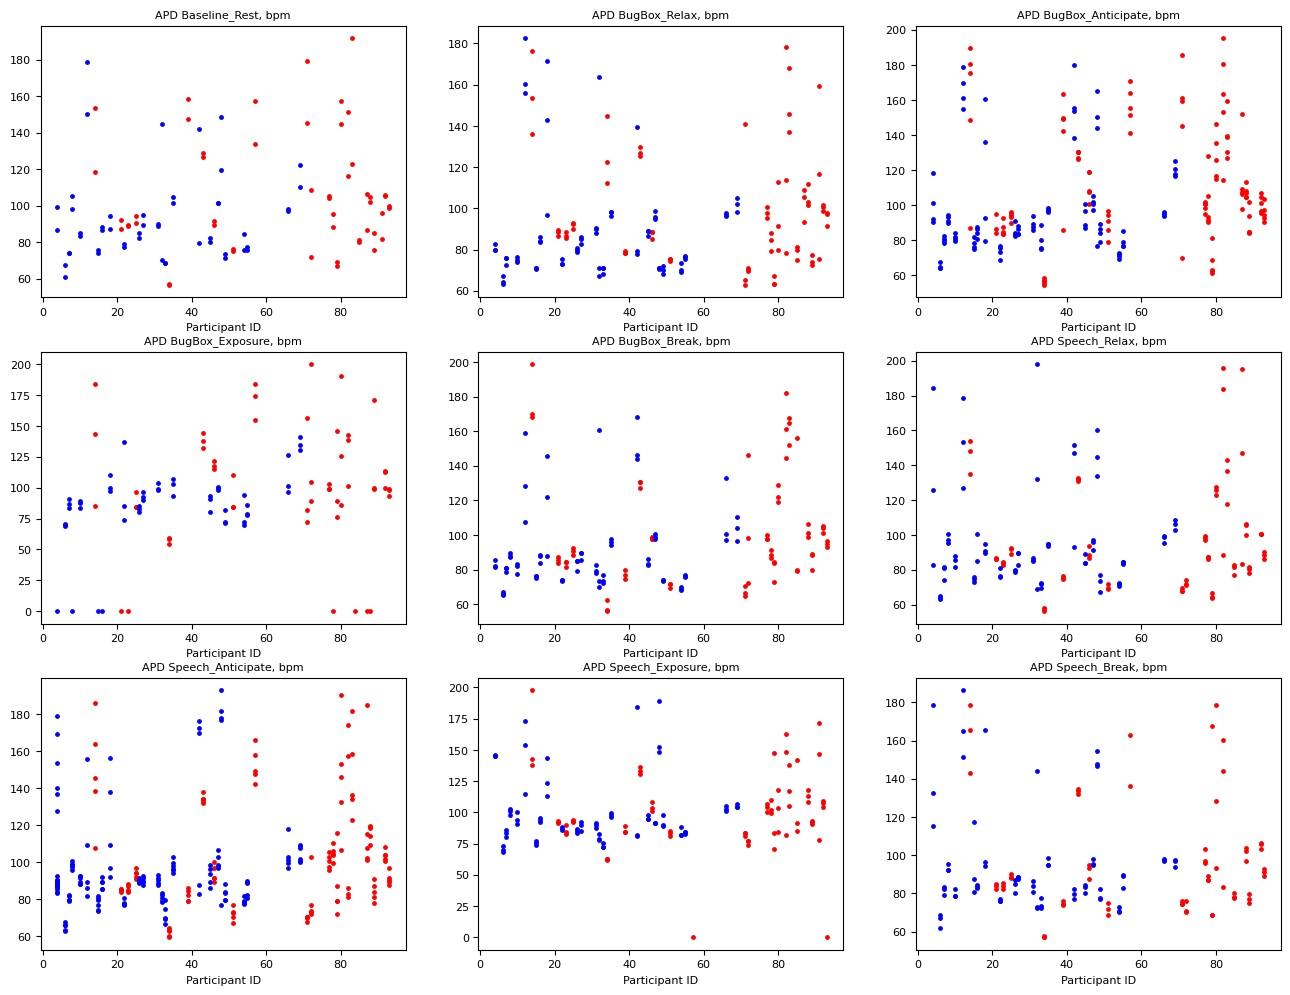

In [89]:
# SCATTERPLOTS
importlib.reload(dr_a)
importlib.reload(train)


phases = dr_a.Phases.PHASES_LIST
metrics = [
    train.Metrics.BPM, 
    train.Metrics.RMSSD, 
    train.Metrics.HF_RR, 
    train.Metrics.LF_RR, 
    train.Metrics.IBI, 
    train.Metrics.SDNN, 
    train.Metrics.MEAN_SCL, 
    train.Metrics.SCR_RATE
]

for metric in metrics[0:1]:
    fig, axs = plt.subplots(3, len(phases) // 3, sharex=False, sharey=False)
    fig.set_size_inches(16, 12)
    row = 0
    col = 0
    for j, phase in enumerate(phases):
        file_name = os.path.join(dr_a.Paths.METRICS, f"{metric}_{phase}_ha.csv")
        df_ha = pd.read_csv(file_name, index_col=[0])
        file_name = os.path.join(dr_a.Paths.METRICS, f"{metric}_{phase}_la.csv")
        df_la = pd.read_csv(file_name, index_col=[0])

        if metric == "bpm":
            for i in range(1, df_ha.shape[1]-1):
                df_ha = df_ha.drop(df_ha[df_ha.iloc[:, i] > 200].index)
            for i in range(1, df_la.shape[1]-1):
                df_la = df_la.drop(df_la[df_la.iloc[:, i] > 200].index)

        if j != 0 and j%3 == 0:
            row += 1
            col = 0
        for i in range(df_ha.shape[0]):
            for j in range(1, df_ha.shape[1]-1):
                axs[row][col].scatter(df_ha.iloc[i, 0], df_ha.iloc[i, j], color='r', s=plt.rcParams['lines.markersize'])
        
        for i in range(df_la.shape[0]):
            for j in range(1, df_la.shape[1]-1):
                axs[row][col].scatter(df_la.iloc[i, 0], df_la.iloc[i, j], color='b', s=plt.rcParams['lines.markersize'])
        # axs[row][col].legend()
        axs[row][col].set_xlabel("Participant ID", fontdict={"fontsize": 8})
        axs[row][col].set_title(f"APD {phase}, {metric}", fontdict={"fontsize": 8})
        
        col += 1

### WESAD

In [ ]:
# HISTOGRAMS
importlib.reload(dr_w)
importlib.reload(train)


phases = dr_w.Phases.PHASE_ORDER
metrics = [
    train.Metrics.BPM, 
    train.Metrics.RMSSD, 
    train.Metrics.HF_RR, 
    train.Metrics.LF_RR, 
    train.Metrics.IBI, 
    train.Metrics.SDNN, 
    train.Metrics.MEAN_SCL, 
    train.Metrics.SCR_RATE
]

for metric in metrics:
    fig, axs = plt.subplots(2, len(phases) // 2 + 1, sharex=False, sharey=False)
    fig.set_size_inches(16, 12)
    row = 0
    col = 0
    for j, phase in enumerate(phases):
        x, y = train.Train_WESAD.get_wesad_data([metric], [phase], label_type="stai", normalize=False)
        x = pd.concat([x, y], axis=1)
        x_ha = x[x["label"] == 1]
        x_la = x[x["label"] == 0]

        if j == len(phases) // 2 + 1:
            row = 1
            col = 0
        axs[row][col].hist(
            [x_ha[metric], x_la[metric]], color=['r', 'b'], alpha=0.5, 
            weights=[np.ones_like(x_ha[metric]) / len(x_ha[metric]), np.ones_like(x_la[metric]) / len(x_la[metric])], 
            label=["High state anxiety", "Low state anxiety"]
            )
        axs[row][col].set_title(f"WESAD {phase}, {metric}", fontdict={"fontsize": 8})
        axs[row][col].legend(loc=1, prop={'size': 8})
        axs[row][col].ticklabel_format(style='sci')
        col += 1

### POPANE

In [ ]:
# HISTOGRAMS
importlib.reload(dr_p)
importlib.reload(train)

studies_popane = [
    "Study1",
    "Study2",
    "Study3",
    # "Study4",
    "Study5",
    # "Study6",
    # "Study7"
]

model_phases_popane = [
    dr_p.Study1.ALL,
    # [dr_p.Study1.BASELINE, dr_p.Study1.POSITIVE_EMOTION_HIGH_APPROACH, dr_p.Study1.THREAT],
    dr_p.Study2.ALL,
    dr_p.Study3.ALL,
    # dr_p.Study4.ALL,
    dr_p.Study5.ALL
    # dr_p.Study6.ALL
    # dr_p.Study7.ALL
]

metrics = [
    train.Metrics.BPM, 
    train.Metrics.RMSSD, 
    train.Metrics.HF_RR, 
    train.Metrics.LF_RR, 
    train.Metrics.IBI, 
    train.Metrics.SDNN, 
    train.Metrics.MEAN_SCL, 
    train.Metrics.SCR_RATE
]

for i, study in enumerate(studies_popane):
    phases = model_phases_popane[i]
    if study in ["Study1", "Study2", "Study7"]:
        labels = ["Approach motivational tendency (positive)", "Avoidance motivational tendency (negative)"]
    if study in ["Study3", "Study5", "Study6"]:
        labels = ["High valence", "Low valence"]
    for metric in metrics:
        fig, axs = plt.subplots(2, len(phases) // 2 + 1, sharex=False, sharey=False)
        fig.set_size_inches(16, 12)
        row = 0
        col = 0
        for j, phase in enumerate(phases):
            x, y = train.Train_POPANE.get_popane_data(study, [metric], [phase], label_type="affect", normalize=False)
            x = pd.concat([x, y], axis=1)
            x_ha = x[x["label"] == 1]
            x_la = x[x["label"] == 0]

            if j == len(phases) // 2 + 1:
                row = 1
                col = 0
            axs[row][col].hist(
                [x_ha[metric], x_la[metric]], color=['r', 'b'], alpha=0.5, 
                weights=[np.ones_like(x_ha[metric]) / len(x_ha[metric]), np.ones_like(x_la[metric]) / len(x_la[metric])], 
                label=labels
                )
            axs[row][col].set_title(f"POPANE {study} {phase}, {metric}", fontdict={"fontsize": 8})
            axs[row][col].legend(loc=1, prop={'size': 8})
            col += 1